In [1]:
import sys
import requests
from time import sleep
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

# Requête 

In [2]:
# Variable initialisation
N_request = 50
category = ['tiny','small','medium','large']
listCourse = []
listMissTop = []

In [3]:
def request(category, cpt, listMissTop, oldTop=None) :
    r = requests.get('http://tortues.ecoquery.os.univ-lyon1.fr:8080/'+str(category))
    r_json = r.json()
    recs = r_json['tortoises']
    df = pd.json_normalize(recs)
    if cpt == 0 :
        oldTop = df.top[0]
    if cpt != 0 :
        #print("old top : "+str(oldTop) + " et new top: "+str(df.top[0]))
        if df.top[0] != (oldTop + 1) :
            print("Rattage de top ! ")
            listMissTop.append(cpt+1)
        oldTop = df.top[0]
    df['iterration_update'] = cpt
    return df,oldTop

In [4]:
oldTop = None
repeat = True
cpt=0    
while cpt < N_request :
    print('Requete '+str(cpt+1))
    res = request('tiny',cpt,listMissTop,oldTop)
    listCourse.append(res[0])
    oldTop = res[1]
    #repeat = res[2]
    sleep(3)
    cpt += 1

Requete 1
Requete 2
Requete 3
Requete 4
Requete 5
Requete 6
Requete 7
Requete 8
Requete 9
Requete 10
Requete 11
Requete 12
Requete 13
Requete 14
Requete 15
Requete 16
Requete 17
Requete 18
Requete 19
Requete 20
Requete 21
Requete 22
Requete 23
Requete 24
Requete 25
Requete 26
Requete 27
Requete 28
Requete 29
Requete 30
Requete 31
Rattage de top ! 
Requete 32
Requete 33
Requete 34
Requete 35
Requete 36
Requete 37
Requete 38
Requete 39
Requete 40
Requete 41
Requete 42
Requete 43
Requete 44
Requete 45
Requete 46
Requete 47
Requete 48
Requete 49
Requete 50


# Conversion dataframe

In [5]:
df = pd.concat(listCourse)
df['vitesse'] = 0

In [6]:
df.loc[df.iterration_update == 0,'vitesse'] = -1
df.head(20)

,id,top,position,iterration_update,vitesse
0,0,142298,25665363,0,-1
1,1,142298,52009029,0,-1
2,2,142298,28686573,0,-1
3,3,142298,27501614,0,-1
4,4,142298,26490171,0,-1
5,5,142298,19068176,0,-1
6,6,142298,49092810,0,-1
7,7,142298,27647043,0,-1
8,8,142298,14928437,0,-1
9,9,142298,25498424,0,-1


In [7]:
df = df.sort_values(by=['id','top'])

In [8]:
df ['ecart_position_avec_precedent'] = df.groupby('id')['position'].diff()

In [9]:
df ['acceleration'] = df.groupby('id')['ecart_position_avec_precedent'].diff()

# Calcul des vitesses

In [10]:
df_ecart = df[df['vitesse'] != -1]
df_ecart

,id,top,position,iterration_update,vitesse,ecart_position_avec_precedent,acceleration
0,0,142299,25665732,1,0,369.0,NaN
0,0,142300,25665756,2,0,24.0,-345.0
0,0,142301,25666085,3,0,329.0,305.0
0,0,142302,25666253,4,0,168.0,-161.0
0,0,142303,25666361,5,0,108.0,-60.0
...,...,...,...,...,...,...,...
9,9,142344,25506682,45,0,156.0,-3.0
9,9,142345,25506941,46,0,259.0,103.0
9,9,142346,25507136,47,0,195.0,-64.0
9,9,142347,25507424,48,0,288.0,93.0


In [11]:
df_ecart = df_ecart.drop('vitesse', 1)
df_ecart

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration
0,0,142299,25665732,1,369.0,NaN
0,0,142300,25665756,2,24.0,-345.0
0,0,142301,25666085,3,329.0,305.0
0,0,142302,25666253,4,168.0,-161.0
0,0,142303,25666361,5,108.0,-60.0
...,...,...,...,...,...,...
9,9,142344,25506682,45,156.0,-3.0
9,9,142345,25506941,46,259.0,103.0
9,9,142346,25507136,47,195.0,-64.0
9,9,142347,25507424,48,288.0,93.0


In [12]:
df_ecart = df_ecart.loc[:,~df_ecart.columns.duplicated()]
df_ecart = df_ecart.reset_index(drop=True)
df_ecart

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration
0,0,142299,25665732,1,369.0,NaN
1,0,142300,25665756,2,24.0,-345.0
2,0,142301,25666085,3,329.0,305.0
3,0,142302,25666253,4,168.0,-161.0
4,0,142303,25666361,5,108.0,-60.0
...,...,...,...,...,...,...
485,9,142344,25506682,45,156.0,-3.0
486,9,142345,25506941,46,259.0,103.0
487,9,142346,25507136,47,195.0,-64.0
488,9,142347,25507424,48,288.0,93.0


In [13]:
df_join = df_ecart.groupby('id').agg(lambda x: x.tolist())

In [14]:
df_join['acceleration'].apply(lambda x : x.pop(0))

id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: acceleration, dtype: float64

In [15]:
df_join['distraite'] = None
df_join['endormie'] = None
df_join['cyclique'] = None
df_join['regulier'] = None
df_join

,top,position,iterration_update,ecart_position_avec_precedent,acceleration,distraite,endormie,cyclique,regulier
id,,,,,,,,,
0,"[142299, 142300, 142301, 142302, 142303, 14230...","[25665732, 25665756, 25666085, 25666253, 25666...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[369.0, 24.0, 329.0, 168.0, 108.0, 95.0, 22.0,...","[-345.0, 305.0, -161.0, -60.0, -13.0, -73.0, 1...",None,None,None,None
1,"[142299, 142300, 142301, 142302, 142303, 14230...","[52009396, 52009763, 52010131, 52010498, 52010...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[367.0, 367.0, 368.0, 367.0, 368.0, 364.0, 367...","[0.0, 1.0, -1.0, 1.0, -4.0, 3.0, 0.0, 1.0, -3....",None,None,None,None
2,"[142299, 142300, 142301, 142302, 142303, 14230...","[28686891, 28687166, 28687523, 28687686, 28687...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[318.0, 275.0, 357.0, 163.0, 184.0, 42.0, 175....","[-43.0, 82.0, -194.0, 21.0, -142.0, 133.0, -17...",None,None,None,None
3,"[142299, 142300, 142301, 142302, 142303, 14230...","[27501935, 27502241, 27502294, 27502629, 27502...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[321.0, 306.0, 53.0, 335.0, 242.0, 178.0, 395....","[-15.0, -253.0, 282.0, -93.0, -64.0, 217.0, -1...",None,None,None,None
4,"[142299, 142300, 142301, 142302, 142303, 14230...","[26490293, 26490474, 26490592, 26490711, 26490...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[122.0, 181.0, 118.0, 119.0, 240.0, 141.0, 117...","[59.0, -63.0, 1.0, 121.0, -99.0, -24.0, 1.0, 6...",None,None,None,None
5,"[142299, 142300, 142301, 142302, 142303, 14230...","[19068396, 19068592, 19068764, 19068912, 19069...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[220.0, 196.0, 172.0, 148.0, 124.0, 100.0, 76....","[-24.0, -24.0, -24.0, -24.0, -24.0, -24.0, -24...",None,None,None,None
6,"[142299, 142300, 142301, 142302, 142303, 14230...","[49093155, 49093500, 49093845, 49094190, 49094...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None
7,"[142299, 142300, 142301, 142302, 142303, 14230...","[27647263, 27647645, 27647733, 27647844, 27648...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[220.0, 382.0, 88.0, 111.0, 175.0, 221.0, 325....","[162.0, -294.0, 23.0, 64.0, 46.0, 104.0, -90.0...",None,None,None,None
8,"[142299, 142300, 142301, 142302, 142303, 14230...","[14928557, 14928672, 14928722, 14928829, 14928...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[120.0, 115.0, 50.0, 107.0, 89.0, 35.0, 176.0,...","[-5.0, -65.0, 57.0, -18.0, -54.0, 141.0, -78.0...",None,None,None,None


# Visualisation 

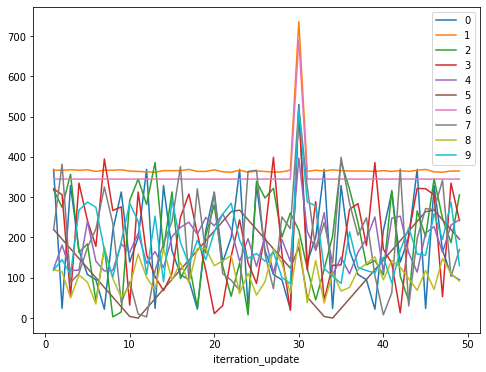

In [16]:
id = 5
fig, ax = plt.subplots(figsize=(8,6))

for i, g in df.groupby('id'):
    g.plot(x='iterration_update', y='ecart_position_avec_precedent', ax=ax, label=str(i))

plt.show()

# Fonction Typage

Les tortues fatiguées s’endorment au fur et à mesure qu’elles avancent. Leur vitesse diminue à un rythme constant jusqu’à tomber à 0. Ces tortues se réveillent alors et recommencent à accélérer (au même rythme qu’elles ont ralenti) jusqu’à atteindre le vitesse initiale, puis elles recommencent alors à s’endormir. Il est possible que le rythme de (décroissance) soit différent au moment de l’arrêt de la tortue et au moment où elle termine sa réaccélération à sa vitesse de départ. On prendra la convention que les tortues fatiguées et cycliques sont considérées comme fatiguées, mais pas comme cycliques. (paramètres: vitesse initiale et rythme de (dé)croissance)

In [17]:
# Detection des tortues endormies
def detect_sleeped(array):
    # On converti les valeurs d'acceleration en valeur absolu pour les conditionner aux regles de rythmes des tortues
    # Par rapport aux valeurs de cycles attendus pour l'acceleration
    n = len(array)
    freq_array = []
    array_abs = np.absolute(array)
    unique_elements, counts_elements = np.unique(array_abs, return_counts=True)
    value_count = np.asarray((unique_elements, counts_elements))
    # On recupere les frequences pour toutes les accelerations 
    for freq in value_count[1] :
        freq_array.append(freq / n)
    max_freq = np.array(freq_array).max()
    # On regarde quelle est l'acceleration la plus significative en terme de ratio et on l'a stocke dans value
    index = np.argmax(freq_array)
    value = unique_elements[index]
    print(value)
    # Si la tortue n'est pas reguliere alors c'est potentiellement une tortue endormie
    if value != 0: 
        cpt = 0
        # on regarde que les times series enregistrés vérifient les conditions des tortues endormies
        for e in array_abs :
            # Si notre premiere valeur est un miss ou un ajustement
            if e != value and cpt == 0 :
                if array_abs[cpt+1] == value:
                    cpt += 1
                    continue
                
            # Si on tombe tout le temps sur le coefficient d'acceleration enregistré comme le plus frequente on continue
            if e == value :
                cpt += 1
                continue
            
            # Si ce n'est pas la premiere valeur et que la valeur absolue de la valeur d'acceleration au top avant (n-1)
            # Est égale a la valeur absolue de la valeur d'acceleration au top apres (n+1)
            # Alors c'est un ratage de top et donc ce n'est pas a prendre en consideration
            # Le top courant
            elif cpt > 0 and e != value :
                print(str(e)+" et "+str(value))
    
                #S'il ya ratage de top, on verifie avec les valeurs d'avant et d'apres
                if array_abs[cpt-1] == value or array_abs[cpt+1] == value :
                    #print('ratage de top')
                    cpt += 1
                    continue
                    
                    
                    if array_abs[cpt-2] == value :
                        print('reacceleration')
                        cpt += 1
                        continue
                    else :
                        return False
                if   array_abs[cpt+1] != value :
                    #Il est possible que le rythme de (décroissance) soit différent au moment de l’arrêt 
                    # de la tortue et au moment où elle termine sa réaccélération à sa vitesse de départ
                    
                    #On verifie du côté gauche
                    if array_abs[cpt+2] == value :
                        print('reacceleration')
                        cpt += 1
                        continue
                    else :
                        return False
                   
                
                else :
                    return False
            
            # Sinon ce n'est pas une tortue endormie
            else :
                return False
        # l'ensemble des accelerations enregistrés respectent les conditions d'accelerations des tortues endormies
        return True
    else :
        # Sinon c'est pas une tortue endormie
        return False


In [18]:
detect_sleeped(df_join['acceleration'][3])

1.0


False

In [19]:
df_join['acceleration'][5]

[-24.0,
 -24.0,
 -24.0,
 -24.0,
 -24.0,
 -24.0,
 -24.0,
 -24.0,
 -24.0,
 -4.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 4.0,
 -24.0,
 -24.0,
 -24.0,
 -24.0,
 -24.0,
 -24.0,
 52.0,
 -124.0,
 -24.0,
 -24.0,
 -4.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 4.0,
 -24.0,
 -24.0,
 -24.0]

In [20]:
# Detection des tortues régulières
def detect_regular(array) :
    # On procede pareil que dans la fonction detect_sleeped ici sauf que on verifie 
    # que le coefficient d'acceleration le plus frequent 0 est présent partout
    # Ici il faut prendre en consideration les possibles "ratage" de top.
    # On verifie que chaque valeur d'acceleration des tortues est égale à 0 et 
    # il faut verifier si entre deux times series qui ont une accelerations nulle
    # on a une time serie avec un point "abérrant" (outlier) qui se traduit par un "ratage" de top
    # qu'il ne faut pas prendre en consideration
    n = len(array)
    freq_array = []
    array_abs = np.absolute(array)
    unique_elements, counts_elements = np.unique(array_abs, return_counts=True)
    value_count = np.asarray((unique_elements, counts_elements))
    for freq in value_count[1] :
        freq_array.append(freq / n)
    max_freq = np.array(freq_array).max()
    index = np.argmax(freq_array)
    value = unique_elements[index]
    print(value)
    # Si la valeur la plus fréquente est  0 alors c'est potentiellement une tortue réguliere
    if value == 0 :
        cpt = 0
        for e in array_abs :
            # Si on rate le top entre deux requêtes on prends pas l'acceleration de cette time serie en consideration
            # Donc on verifie si ya un "ratage" de top
            if e != 0 :
                print(str(array_abs[cpt])+" et "+ str(array_abs[cpt+1]))
                if array_abs[cpt] == array_abs[cpt-1] or array_abs[cpt] == array_abs[cpt+1] :
                    cpt += 1
                    continue
                # Sinon ce n'est pas une tortue réguliere
                else:
                    return False
            # Sinon on verifie que l'acceleration est égale a zero
            elif e == 0 :
                cpt += 1
                continue
            
        return True
    else :
        return False

In [21]:
def detectMissTop(cpt, array_miss_top):
    for i in array_miss_top :
        if cpt == (i - 1) - 1 :
            return True
        return False
            
        

def detect_cycle(array, missTop):
    visited = []
    current_cycle = []
    cpt = 0
    cpt_miss = 0
    cycle_find = False
    # pour chaque element
    for i in array :
        if cpt == 0 :     
            start = i
            print("start :"+str(i))
        elif cpt_miss > 0 :
            cpt_miss -= 1
            pass
        # Si il est déjà visité et que c'est bien notre premier element 
        elif i in visited and i == start :
            #print("déjà visité !")
            longueur_cycle = cpt
            print("longueur du cycle :"+str(longueur_cycle))
            # Deuxieme compteur pour continuer le tableau
            cpt2 = 0
            # Check si a partir de cet element le cycle se reproduit
            for index in range(cpt, len(array)) :
                # Si l'element du tableau respecte le cycle alors on continue
                #print("compare :"+str(visited[cpt2]) +"et "+str(array[index]))
                if visited[cpt2] == array[index] :
                    cpt2 += 1
                    if cpt2 == longueur_cycle :
                        cpt2 = 0
                    else :
                        print("on continue cpt2 :"+str(cpt2))
                        print(visited)
                        continue

                # Sinon 
                else :
                    # si c'est le premier element du cycle alors 
                    if array[index] == visited[0] :
                        # si le deuxieme compteur est egal a la longueur du cycle alors c'est un cycle
                        return True
                    else :
                    # Sinon c'est faux
                        return False
        
            
        # Si il n'est pas visité on l'ajoute au cycle
        elif i not in visited :
            # Cas si ya un rate de top
            if cpt >= 1 :
                if detectMissTop(cpt,missTop):
                    print('detected')
                    cpt_miss = 1 
                    current_cycle.append(None)
                else :
                    visited.append(i)
                    current_cycle.append(i)
                    print("visited: "+str(visited))
        
        cpt += 1

#detect_cycled([1,2,3,4,1,2,3,4,3,4,2])

In [22]:
def detect_cycle2(array, array_miss_top):
    potential_cycle = False
    test_cycle = False
    visited = []
    current_cycle = []
    cycle = []
    count_cycle = 0
    cpt_current_cycle = 0
    cpt_current_element = 0
    len_cycle = 0
    for e in array :
        # Premier cas on append simplement :
        if cpt_current_element == 0 :
            cpt_current_cycle += 1
            current_cycle.append(e)
            visited.append(e)
            cpt_current_element += 1
        
        else :
            # Si on a pas de cycle potentiel et qu'on detect un ratage de top, on reset le cycle
            if detectMissTop(cpt_current_element,array_miss_top) and potential_cycle == False :
                #print(cpt_current_element)
                cpt_current_cycle = 0
                current_cycle = []
                #print('top_raté_detected')
            
            # Si on a pas encore de cycle potentiel et qu'on retombe sur le premier element du cycle courant
            # Alors on on a un cycle potentiel
            elif len(current_cycle) > 0 and e == current_cycle[0] and potential_cycle == False and len(current_cycle) > 1 and e != current_cycle[cpt_current_cycle-1] :
                potential_cycle = True
                visited.append(e)
                cpt_current_element + 1
                len_cycle = cpt_current_cycle
                cycle = current_cycle
                print('cycle potentiel:'+str(cycle))
                print("longueur: " + str(len_cycle))
                #print(visited)
            
            elif potential_cycle == True :
                if cpt_current_cycle == len_cycle and test_cycle == False :
                    cpt_current_cycle = 1 
                    test_cycle = True
                elif cpt_current_cycle == len_cycle and test_cycle == True : 
                    cpt_current_cycle = 0
                    current_cycle = []
                elif cpt_current_cycle > len_cycle : 
                    cpt_current_cycle -= len_cycle
                    
                #print("element: "+str(e) + " et element du cycle: "+ str(cycle[cpt_current_cycle]))
                #print("Valeur compteur du cycle courrant "+str(cpt_current_cycle))
                #print()
                if detectMissTop(cpt_current_element,array_miss_top):
                    cpt_current_cycle += 2
                    
                elif cycle[cpt_current_cycle] == e :
                    #print('suis le cycle')
                    cpt_current_cycle += 1
                else :
                    return False

            else :
                cpt_current_cycle += 1
                current_cycle.append(e)
                visited.append(e)
            #print(current_cycle)
            cpt_current_element += 1
            
    if test_cycle == True :
        return True
    else :
        return False

In [23]:
def detect_distraite(df,id) :
    if df['endormie'][id] == False :
        if df['regulier'][id] == False :
            if df['cyclique'][id] == False :
                min_vitesse = np.array(df['ecart_position_avec_precedent'][id]).min()
                max_vitesse = np.array(df['ecart_position_avec_precedent'][id]).max()
                
                return True,min,max
    return False


In [24]:
listMissTop

[31]

# Detection des tortues

In [25]:
df_join = df_join.reset_index()

In [26]:
array_id = df_join['id'].unique()
for i in array_id :
    df_join['endormie'][i] = detect_sleeped(df_join['acceleration'][i])
    df_join['regulier'][i] = detect_regular(df_join['acceleration'][i])
    df_join['cyclique'][i] = detect_cycle2(df_join['ecart_position_avec_precedent'][i],listMissTop)
    df_join['distraite'][i] = detect_distraite(df_join,i)

13.0
13.0
cycle potentiel:[369.0, 24.0, 329.0, 168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0, 200.0]
longueur: 11
1.0
4.0 et 1.0
3.0 et 1.0
reacceleration
0.0 et 1.0
3.0 et 1.0
4.0 et 1.0
0.0 et 1.0
1.0
cycle potentiel:[367.0, 367.0, 368.0]
longueur: 3
83.0
83.0
1.0
1.0
1.0
1.0
24.0
4.0 et 24.0
4.0 et 24.0
52.0 et 24.0
124.0 et 24.0
4.0 et 24.0
4.0 et 24.0
24.0
cycle potentiel:[220.0, 196.0, 172.0, 148.0, 124.0, 100.0, 76.0, 52.0, 28.0, 4.0, 0.0, 24.0, 48.0, 72.0, 96.0, 120.0, 144.0, 168.0, 192.0, 216.0, 240.0, 264.0, 268.0, 244.0]
longueur: 24
0.0
0.0
345.0 et 345.0
345.0 et 0.0
3.0
3.0
17.0
17.0
19.0
19.0
cycle potentiel:[288.0, 279.0, 123.0, 104.0, 86.0, 214.0, 126.0, 118.0, 112.0, 151.0, 87.0, 168.0, 224.0, 159.0, 156.0, 259.0, 195.0]
longueur: 17


<ipython-input-26-9ba93cb29c50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['endormie'][i] = detect_sleeped(df_join['acceleration'][i])
<ipython-input-26-9ba93cb29c50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['regulier'][i] = detect_regular(df_join['acceleration'][i])
<ipython-input-26-9ba93cb29c50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['cyclique'][i] = detect_cycle2(df_join['ecart_positi

In [27]:
print(detect_distraite(df_join,2))

(True, <built-in function min>, <built-in function max>)


In [28]:
df_join

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration,distraite,endormie,cyclique,regulier
0,0,"[142299, 142300, 142301, 142302, 142303, 14230...","[25665732, 25665756, 25666085, 25666253, 25666...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[369.0, 24.0, 329.0, 168.0, 108.0, 95.0, 22.0,...","[-345.0, 305.0, -161.0, -60.0, -13.0, -73.0, 1...",False,False,True,False
1,1,"[142299, 142300, 142301, 142302, 142303, 14230...","[52009396, 52009763, 52010131, 52010498, 52010...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[367.0, 367.0, 368.0, 367.0, 368.0, 364.0, 367...","[0.0, 1.0, -1.0, 1.0, -4.0, 3.0, 0.0, 1.0, -3....","(True, <built-in function min>, <built-in func...",False,False,False
2,2,"[142299, 142300, 142301, 142302, 142303, 14230...","[28686891, 28687166, 28687523, 28687686, 28687...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[318.0, 275.0, 357.0, 163.0, 184.0, 42.0, 175....","[-43.0, 82.0, -194.0, 21.0, -142.0, 133.0, -17...","(True, <built-in function min>, <built-in func...",False,False,False
3,3,"[142299, 142300, 142301, 142302, 142303, 14230...","[27501935, 27502241, 27502294, 27502629, 27502...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[321.0, 306.0, 53.0, 335.0, 242.0, 178.0, 395....","[-15.0, -253.0, 282.0, -93.0, -64.0, 217.0, -1...","(True, <built-in function min>, <built-in func...",False,False,False
4,4,"[142299, 142300, 142301, 142302, 142303, 14230...","[26490293, 26490474, 26490592, 26490711, 26490...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[122.0, 181.0, 118.0, 119.0, 240.0, 141.0, 117...","[59.0, -63.0, 1.0, 121.0, -99.0, -24.0, 1.0, 6...","(True, <built-in function min>, <built-in func...",False,False,False
5,5,"[142299, 142300, 142301, 142302, 142303, 14230...","[19068396, 19068592, 19068764, 19068912, 19069...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[220.0, 196.0, 172.0, 148.0, 124.0, 100.0, 76....","[-24.0, -24.0, -24.0, -24.0, -24.0, -24.0, -24...",False,True,True,False
6,6,"[142299, 142300, 142301, 142302, 142303, 14230...","[49093155, 49093500, 49093845, 49094190, 49094...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,True
7,7,"[142299, 142300, 142301, 142302, 142303, 14230...","[27647263, 27647645, 27647733, 27647844, 27648...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[220.0, 382.0, 88.0, 111.0, 175.0, 221.0, 325....","[162.0, -294.0, 23.0, 64.0, 46.0, 104.0, -90.0...","(True, <built-in function min>, <built-in func...",False,False,False
8,8,"[142299, 142300, 142301, 142302, 142303, 14230...","[14928557, 14928672, 14928722, 14928829, 14928...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[120.0, 115.0, 50.0, 107.0, 89.0, 35.0, 176.0,...","[-5.0, -65.0, 57.0, -18.0, -54.0, 141.0, -78.0...","(True, <built-in function min>, <built-in func...",False,False,False
9,9,"[142299, 142300, 142301, 142302, 142303, 14230...","[25498543, 25498688, 25498796, 25499064, 25499...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[119.0, 145.0, 108.0, 268.0, 288.0, 275.0, 169...","[26.0, -37.0, 160.0, 20.0, -13.0, -106.0, -67....","(True, <built-in function min>, <built-in func...",False,False,False



Pour calculer l'accelaration, il suffit de recalculer les ecarts entre les vitesses